In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


Converting the types-

In [5]:
df['Location_Category'] = df['Location_Category'].astype('category')
df['Customer_Loyalty_Status'] = df['Customer_Loyalty_Status'].astype('category')
df['Time_of_Booking'] = df['Time_of_Booking'].astype('category')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   category
 3   Customer_Loyalty_Status  1000 non-null   category
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   category
 7   Vehicle_Type             1000 non-null   category
 8   Expected_Ride_Duration   1000 non-null   int64   
 9   Historical_Cost_of_Ride  1000 non-null   float64 
dtypes: category(4), float64(2), int64(4)
memory usage: 51.5 KB


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<function matplotlib.pyplot.show(close=None, block=None)>

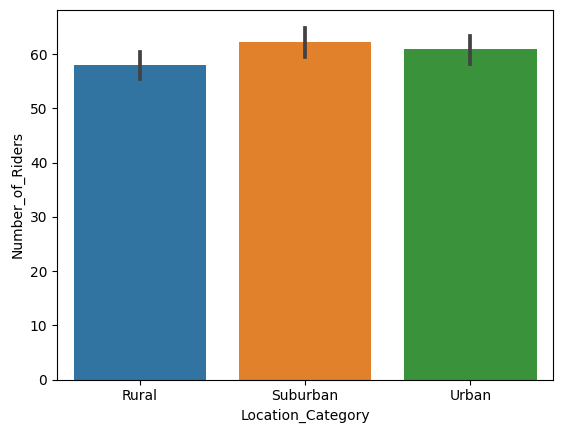

In [6]:
sns.barplot(y = df['Number_of_Riders'], x = df['Location_Category'], data = df)
plt.show

Creating a dynamic pricing logic(?)-

In [7]:
# Demand > Supply --> Price increase
# Demand < Supply --> Price reduction
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv')
df["d_s_ratio"] = round(df["Number_of_Riders"]/df["Number_of_Drivers"], 2)       # d_s_ratio = Demand / Supply

df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623,3.235270
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756,2.533629
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449,1.110000
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202,1.660000
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426,2.360000
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504,3.800000
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419,17.600000


In [8]:
df["demand_class"] = np.where(df["Number_of_Riders"]>np.percentile(df["Number_of_Riders"], 75), 
                               "High_demand", "Low_demand")

df["supply_class"] = np.where(df["Number_of_Drivers"]>np.percentile(df["Number_of_Drivers"], 75), 
                               "High_supply", "Low_supply")

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.00,High_demand,High_supply
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.49,Low_demand,High_supply
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.35,Low_demand,Low_supply
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.18,High_demand,Low_supply
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.55,Low_demand,Low_supply


In [9]:
df["demand_metric"] = np.where(df["demand_class"]=="High_demand", 
                               df["Number_of_Riders"] / np.percentile(df["Number_of_Riders"], 75),
                               df["Number_of_Riders"] / np.percentile(df["Number_of_Riders"], 25))

df["supply_metric"] = np.where(df["supply_class"]=="High_supply", 
                               df["Number_of_Drivers"] / np.percentile(df["Number_of_Drivers"], 75),
                               df["Number_of_Drivers"] / np.percentile(df["Number_of_Drivers"], 25))

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class,demand_metric,supply_metric
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.00,High_demand,High_supply,1.111111,1.184211
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.49,Low_demand,High_supply,1.450000,1.026316
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.35,Low_demand,Low_supply,1.050000,2.818182
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.18,High_demand,Low_supply,1.098765,2.545455
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.55,Low_demand,Low_supply,1.950000,2.000000


In [10]:
import numpy as np

# Calculate demand-to-supply ratio
df['d_s_ratio'] = df['demand_metric'] / df['supply_metric']

# Set cutoff values for high and low demand situations
high_demand_cut_off = 1.15  # High demand, low supply (Demand > Supply)
low_demand_cut_off = 0.85   # Low demand, high supply (Supply > Demand)


# Define correction metric based on demand-supply ratio
df["correction_metric"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                   abs(df["d_s_ratio"] - high_demand_cut_off),  # Increase price
                                   np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                            abs(df["d_s_ratio"] - low_demand_cut_off),  # Decrease price
                                            0))  # No significant change if within the range

# Adjust the ride cost based on demand and supply condition
df["corrected_cost"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                df["Historical_Cost_of_Ride"] * (1 + df["correction_metric"]),  # Price increase
                                np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                         df["Historical_Cost_of_Ride"] * (1 - df["correction_metric"]),  # Price decrease
                                         df["Historical_Cost_of_Ride"]))  # No change if balanced

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class,demand_metric,supply_metric,correction_metric,corrected_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.938272,High_demand,High_supply,1.111111,1.184211,0.000000,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.412821,Low_demand,High_supply,1.450000,1.026316,0.262821,219.572604
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.372581,Low_demand,Low_supply,1.050000,2.818182,0.477419,172.344729
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.431658,High_demand,Low_supply,1.098765,2.545455,0.418342,273.496237
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.975000,Low_demand,Low_supply,1.950000,2.000000,0.000000,579.681422


Ml-

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [12]:
X = df.drop(['corrected_cost'], axis = 1)
y = df['corrected_cost']

In [13]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state = 2)

In [15]:
#encoder = OneHotEncoder()
#X = encoder.fit_transform(X).toarray()
#test_X = encoder.fit_transform(test_X).toarray()

In [16]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 141.73901170449398
